In [104]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Q1 HOW MY DATA LOOKS.




In [105]:
#reading the data
data = pd.read_csv('/content/haberman.csv')
data.head()

#0 - Age
#1 - YearO
#2 - Nodes
#3 - Survival

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [106]:
# Age of patient at time of operation (numerical)

# Patient's year of operation (year - 1900, numerical)

# Number of positive axillary nodes detected (numerical)

# Survival status (class attribute)
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year


# Q2 WHAT IS THE DIMENSION OF MY DATA.





In [107]:
data.shape

(305, 4)

# Q3 IS THERE ANY STEP I NEED TO TAKE TO AVOID DATA REDUNDANCY?

In [108]:
# to avoid data redundancy change columns name
data = pd.read_csv('/content/haberman.csv',header=None,names=['Age','Year','Nodes','Survival'])
data.head()

,Age,Year,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Q4 WHAT IS THE DATATYPE OF MY COLUMNS?

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       306 non-null    int64
 1   Year      306 non-null    int64
 2   Nodes     306 non-null    int64
 3   Survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


# Observation

*   All the columns in the dataset have the data type int64.




# Q5 WHAT IS THE MATHEMATICAL OVERVIEW OF MY DATASET?

In [110]:
data.describe()

,Age,Year,Nodes,Survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Observation

*   The avarage age in the data set is 52.46.
*   In year coloumns we can see that min is 58 and max is 69 so it mean the period of the data set was 1958 to 1969. (11 years)

*  In node we can see the mean is 4.02 it mean we can map the data regarding note.

*   In 50% data the age is 52 so it mean this data is sequenc wise.

# Q6 IS THERE ANY NULL VALUES IN MY DATASET?

---





In [111]:
data.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

# Observation


*   This dataset does not have any null values.




# Q7 IS THERE ANY DUPLICATED






In [112]:
data.duplicated().sum()

17

# Q8 IS THERE ANY CO-RELATION IN MY DATASET?

In [113]:
data.corr()["Age"]

Age         1.000000
Year        0.089529
Nodes      -0.063176
Survival    0.067950
Name: Age, dtype: float64

 # **DATA MANIPULATION**

In [114]:
# replace values from Survival columns using map method

data['Survival']=data['Survival'].map({1:"YES",2:"NO"})

In [115]:
data

,Age,Year,Nodes,Survival
0,30,64,1,YES
1,30,62,3,YES
2,30,65,0,YES
3,31,59,2,YES
4,31,65,4,YES
...,...,...,...,...
301,75,62,1,YES
302,76,67,0,YES
303,77,65,3,YES
304,78,65,1,NO


In [116]:
# percentage of Yes No
data['Survival'].value_counts(normalize=True)*100

YES    73.529412
NO     26.470588
Name: Survival, dtype: float64

Text(0.5, 1.0, 'Density Plot ')

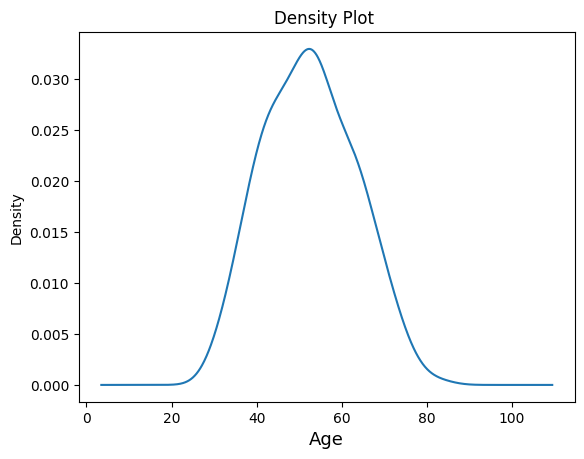

In [117]:
data.Age.plot.density()
plt.xlabel('Age',fontsize = 13)
plt.title("Density Plot ")

# Observation

*   The density plot describe a peek density between the ages of 40 to 65.

# UNIVARIENT ANALYSIS

# CATEGORICAL DATA

**a. Countplot**

<Axes: xlabel='count', ylabel='Survival'>

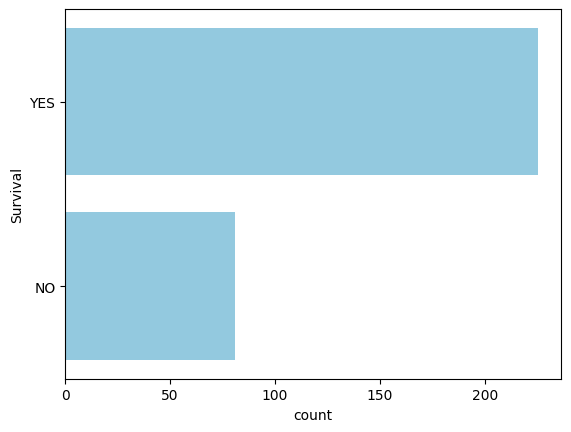

In [118]:
sns.countplot(data["Survival"],color='skyblue')

# Observation

*  The majority of patients successfully survived.

**b. PIE CHART**

Text(0.5, 1.0, 'Percentage of Survival')

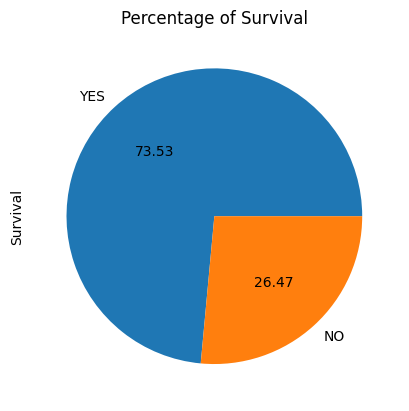

In [119]:
data["Survival"].value_counts().plot(kind="pie",autopct="%.2f")

plt.title('Percentage of Survival')

# Observation

*  73.53% survived.

# NEUMERICAL DATA

**a. Histogram**

Text(0.5, 1.0, 'Histogram')

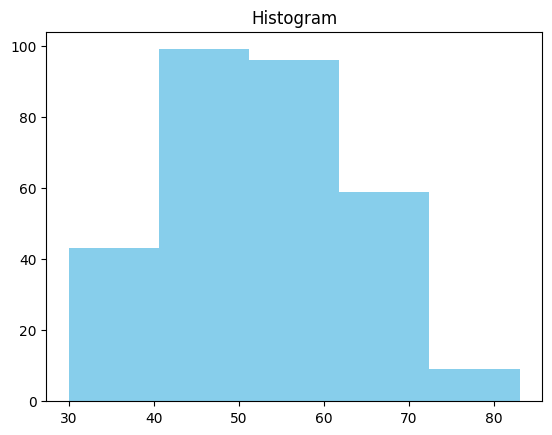

In [120]:
plt.hist(data["Age"], bins=5,color = 'skyblue')
plt.title('Histogram')

**b. distplot(PDF/CDF)**

<ipython-input-121-4301711fe3ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


Text(0.5, 1.0, 'Probability density function')

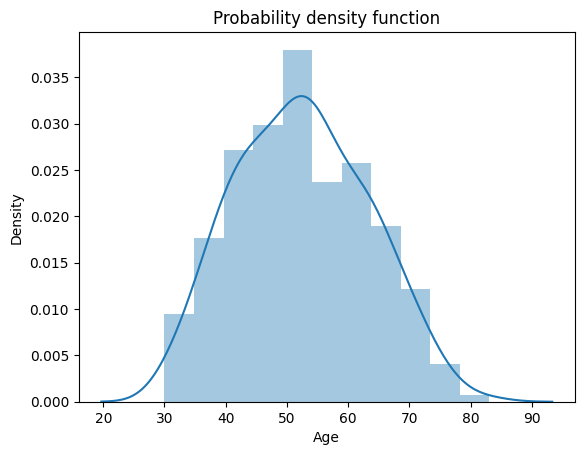

In [121]:
sns.distplot(data["Age"])
plt.title('Probability density function')

**a. boxplot**

Text(0.5, 1.0, 'Boxplot')

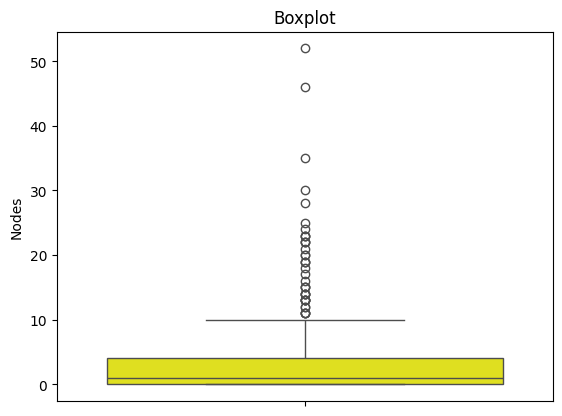

In [122]:
sns.boxplot(data["Nodes"],color = 'Yellow')
plt.title('Boxplot')


# MULTIVARIENT ANALYSIS

**a. Scatter Plot (Neumarical - Neumarical)**

In [123]:
# columns name
data.columns

Index(['Age', 'Year', 'Nodes', 'Survival'], dtype='object')

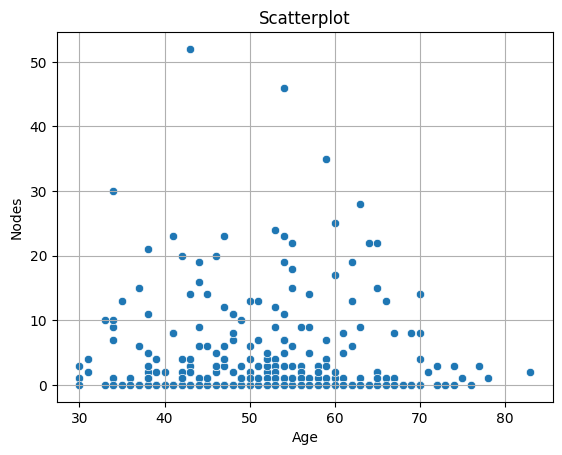

In [124]:
# scatterplot
sns.scatterplot(x="Age", y="Nodes", data=data)
plt.title('Scatterplot')
plt.grid(True)

**b. Bar Plot (Neumarical - Categorical)**

<Axes: xlabel='Age', ylabel='Survival'>

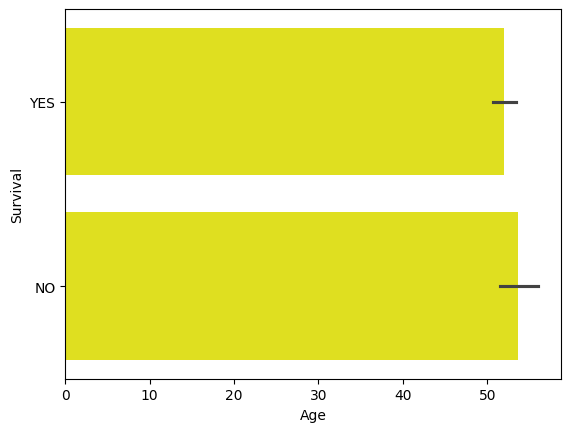

In [125]:
sns.barplot(x="Age",y="Survival",data=data,color = 'Yellow')

**c. Box PLot (Neumarical - Categorical)**

Text(0.5, 1.0, 'Box Plot')

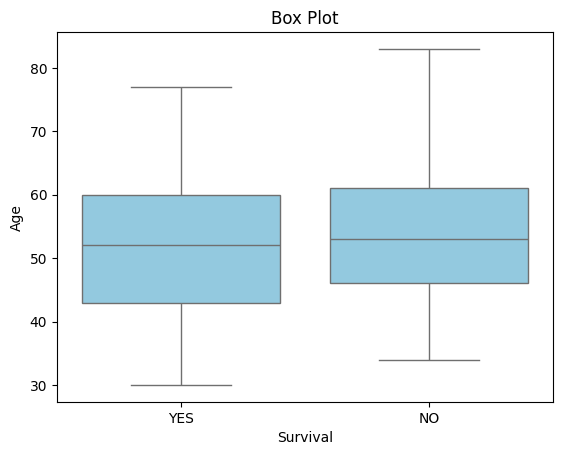

In [126]:
sns.boxplot(x = 'Survival', y = "Age",data = data,color = 'Skyblue')
plt.title('Box Plot')

**d. Dist PLot (Neumarical - Categorical)**

<ipython-input-127-ddd2a4873e04>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"],hist=False)
<ipython-input-127-ddd2a4873e04>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Nodes"],hist=False)


<Axes: xlabel='Nodes', ylabel='Density'>

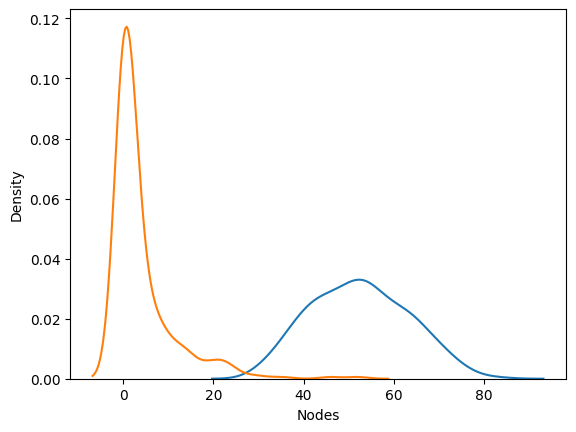

In [127]:
sns.distplot(data["Age"],hist=False)
sns.distplot(data["Nodes"],hist=False)

**e. Heat Map (character - character)**

<ipython-input-128-8be3875175eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot =True)


Text(0.5, 1.0, 'Heat Map')

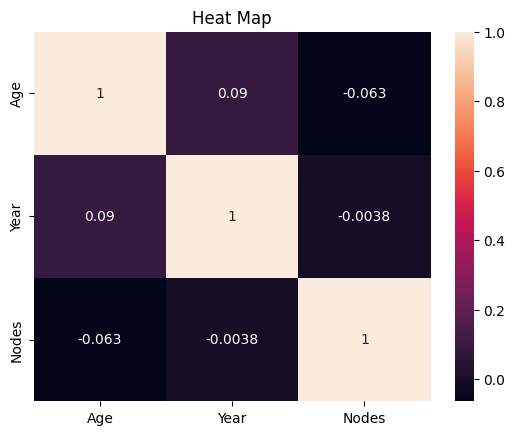

In [128]:
sns.heatmap(data.corr(),annot =True)
plt.title('Heat Map')

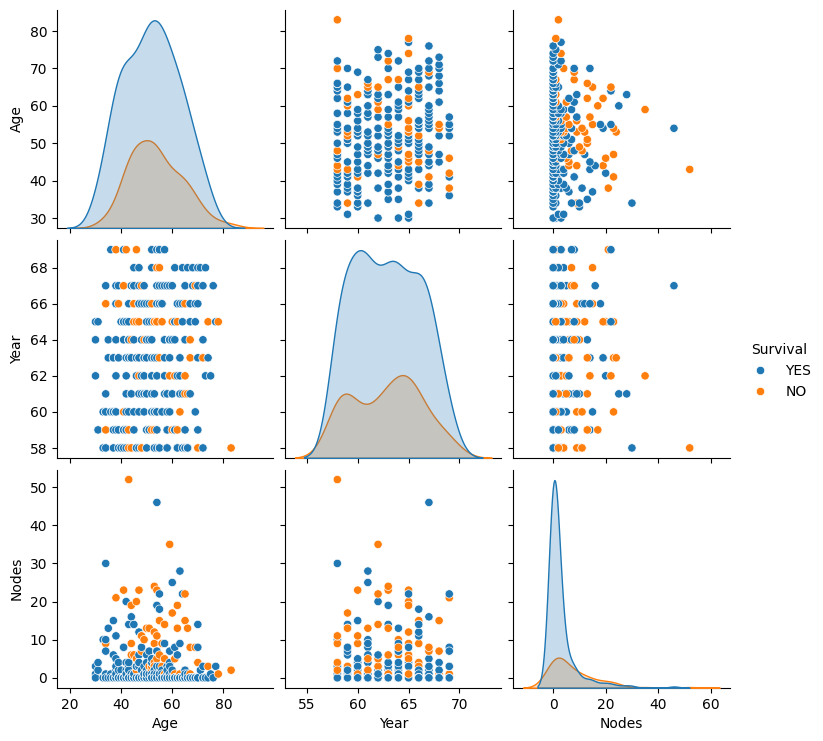

In [129]:
sns.pairplot(data, hue="Survival")